# CA1: Dataframe Manipulation with Spotify Data

Makka Dulgaeva \
Milad Tootoonchi \
Sania Minaipour

## Introduction
Pandas is an extremely powerful tool to handle large amounts of tabular data. In this compulsory assignment, you will use Pandas to explore one of the TA's personal spotify data in depth. \
\
Additional information:
- Feel free to create additional code cells if you feel that one cell per subtask is not sufficient.
- Remember, Pandas uses very efficient code to handle large amounts of data. For-loops are not efficient. If you ever have to use a for-loop to loop over the rows in the DataFrame, you have *probably* done something wrong.
- Label all graphs and charts if applicable.

## Task
I typically enjoy indie and rock music. I am a big fan of everything from old-fashioned rock and roll like Led Zeppelin and Jimi Hendrix, to newer indie artists like Joji and Lana Del Rey. This is why my spotify wrapped for 2023 came as quite a surprise:

<img src="spotifywrapped.PNG" alt="Image Description" width="20%">


Now, I'm no hater of pop music, but this was unexpected. 
For this assignment, you will investigate my listening habits, including a deep dive into my Ariana Grande listening habits, and try to find an answer to why she was my top artist; was there a fault in the spotify algorithm? Am I actually secretly an *Arianator*? (yes, I did have to look that up). Or am I just lying to myself about how often I listen to guilty pleasure music?

## Part 1: Initial loading and exploration

#### 1.0 Import necessary libraries: 
pandas, numpy, matplotlib.pyplot (other libraries such as seaborn or plotly are also allowed if you want prettier plots). It might also be a good idea to use **os** for task 2.0

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# ---- Insert other imports ----

#### 1.1 Loading the data
Load the dataset in the file `streaming_history_0.csv` into a Pandas DataFrame called `df_spotify_0`.

In [8]:
df_spotify_0 = pd.read_csv("./spotify_data/streaminghistory0.csv")

#### 1.2 Help function
Use the Python command `help` to help you understand how to use the `pd.DataFrame.head` and `pd.DataFrame.tail` methods.

In [10]:
help(pd.DataFrame.head)
help(pd.DataFrame.tail)

Help on function head in module pandas.core.generic:

head(self: 'NDFrameT', n: 'int' = 5) -> 'NDFrameT'
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `|n|` rows, equivalent to ``df[:n]``.
    
    If n is larger than the number of rows, this function returns all rows.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal


#### 1.3 Getting an overview
Print the first `five` and last `ten` rows of the dataframe. Have a quick look at which columns are in the dataset. 

In [12]:
print(df_spotify_0.head(5))
print(df_spotify_0.tail(10))

            endTime            artistName                        trackName  \
0  2022-12-03 02:02  Cigarettes After Sex                            Truly   
1  2022-12-03 02:02         Leonard Cohen  Take This Waltz - Paris Version   
2  2022-12-06 21:05          Vlad Holiday                 So Damn Into You   
3  2022-12-06 21:05                 Lorde                             Team   
4  2022-12-06 21:05         Ariana Grande                         Into You   

   msPlayed  
0   30000.0  
1    8210.0  
2   37895.0  
3    8984.0  
4    1221.0  
                endTime         artistName                     trackName  \
11949  2023-01-02 20:58      Ariana Grande                    six thirty   
11950  2023-01-02 20:58      Leonard Cohen          Thanks for the Dance   
11951  2023-01-02 20:59           Des Rocs          Used to the Darkness   
11952  2023-01-02 20:59  Caroline Polachek         Hit Me Where It Hurts   
11953  2023-01-02 20:59  Caroline Polachek         Hit Me Where It 

#### 1.4 Formatting correctly
When working with Pandas, it's very useful to have columns which contains dates in a specific format called *datetime*. This allows for efficient manipulation and analysis of time-series data, such as sorting, filtering by date or time, and resampling for different time periods. Figure out which column(s) would be appropriate to convert to datetime, if any, and if so, perform the conversion to the correct format.

In [18]:
df_spotify_0['endTime'] = pd.to_datetime(df_spotify_0['endTime'])
print(df_spotify_0.dtypes)
print(df_spotify_0['endTime'].head())

endTime       datetime64[ns]
artistName            object
trackName             object
msPlayed             float64
dtype: object
0   2022-12-03 02:02:00
1   2022-12-03 02:02:00
2   2022-12-06 21:05:00
3   2022-12-06 21:05:00
4   2022-12-06 21:05:00
Name: endTime, dtype: datetime64[ns]


#### 1.5 Unique artists
Find how many unique artists are in the dataset.


In [15]:
unique_artists = df_spotify_0['artistName'].nunique()
print(f"Number of unique artists: {unique_artists}")

Number of unique artists: 495


#### 1.6 Unique songs
Find how many unique songs are in the dataset.

In [20]:
unique_songs = df_spotify_0['trackName'].nunique()
print(f"Number of unique songs: {unique_songs}")

Number of unique songs: 1308


### Part 1: Questions
Q1: Which columns are in the dataset? \
    endTime, artistName, trackName, msPlayed
    
Q2: What timeframe does the dataset span? \
    2022-12-03 02:02 -> 2023-01-02 20:59
    
Q3: How many unique artists are in the dataset?\
    495

Q4: How many unique songs are in the dataset? \
    1308

## Part 2: Working with all the data

#### 2.0 Importing all the dataframes
In Task 1, you only worked with about a month worth of data. Now, you will work with over a year worth. 

In the *spotify_data* folder, there is more than just one listening record. Load each of the 14 listening records into a dataframe (1 dataframe per listening record), and concatenate them together into one large dataframe named `df`.

In [23]:
all_files = [f for f in os.listdir("./spotify_data")]

dfs = []

for file in all_files:
    file_path = os.path.join("./spotify_data", file)
    df_temp = pd.read_csv(file_path)
    dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)


#### 2.1 Sorting by time
Datasets often aren't perfect. One example of an issue that could occur is that the time-based data might not be in chronological order. If this were to happen, the rows in your dataframe could be in the wrong order. To ensure this isn't an issue in your dataframe, you should sort the dataframe in chronological order, from oldest to newest.

In [26]:
df['end_time'] = pd.to_datetime(df['endTime'])
df = df.sort_values(by="end_time", ascending=True)

#### 2.2 Setting a timeframe
For this investigation, we are only interested in investigating listening patterns from **2023**. Remove any data not from **2023** from the DataFrame.

In [27]:
df['endTime'] = pd.to_datetime(df['endTime'])
df = df[(df['end_time'].dt.year == 2023)]

#### 2.3 Deleting rows
Often in Data Science, you will encounter when a row entry has the value *NaN*, indicating missing data. These entries can skew your analysis, leading to inaccurate conclusions. For this task, identify and remove any rows in your DataFrame that contain NaN values. \
Later in the course, you might encounter other techniques of dealing with missing data, typically reffered to as *data imputation*. Here, though, you are just supposed to delete the entire rows with missing data.

In [ ]:
df = df.dropna()

#### 2.4 Convert from milliseconds to seconds
From `msPlayed`, create a new column `secPlayed` with the data converted from milliseconds to seconds. Then delete the column `msPlayed`.

In [28]:
df['secPlayed'] = df['msPlayed'] / 1000
df = df.drop(columns=['msPlayed'])

#### 2.5 Finding top 10 favorite artists
Find the top `ten` artists with the highest total play time (in seconds). Plot your findings in a bar graph. \
(hint: start by creating a new DataFrame with only `artistName` and your time column. To proceed, you will also likely need the `groupby` command from Pandas.)

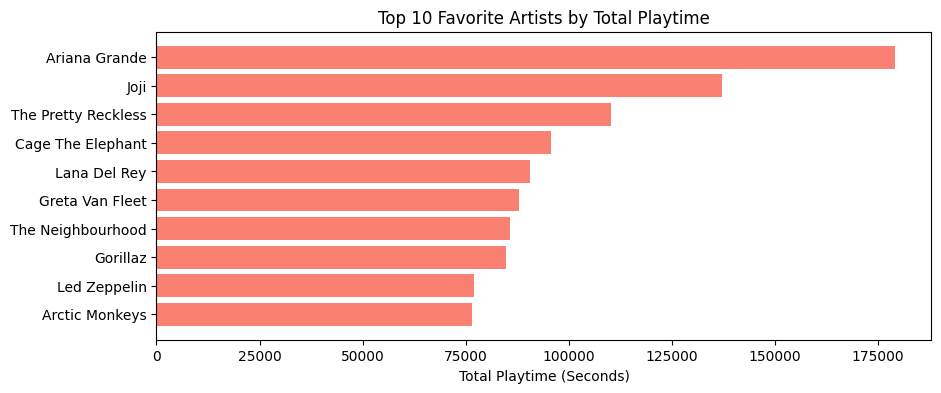

In [43]:
df_artists = df[['artistName', 'secPlayed']]
artist_playtime = df_artists.groupby('artistName')['secPlayed'].sum().reset_index()
artist_playtime_sorted = artist_playtime.sort_values(by='secPlayed', ascending=False)
top_10_artists = artist_playtime_sorted.head(10)

plt.figure(figsize = (10, 4))
plt.barh(top_10_artists['artistName'], top_10_artists['secPlayed'], color = 'salmon')
plt.gca().invert_yaxis()
plt.xlabel('Total Playtime (Seconds)')
plt.title('Top 10 Favorite Artists by Total Playtime')
plt.show()


#### 2.6 Finding top 10 favorite songs
Find the top `ten` songs with the highest play time. Create a graph visualizing the results.

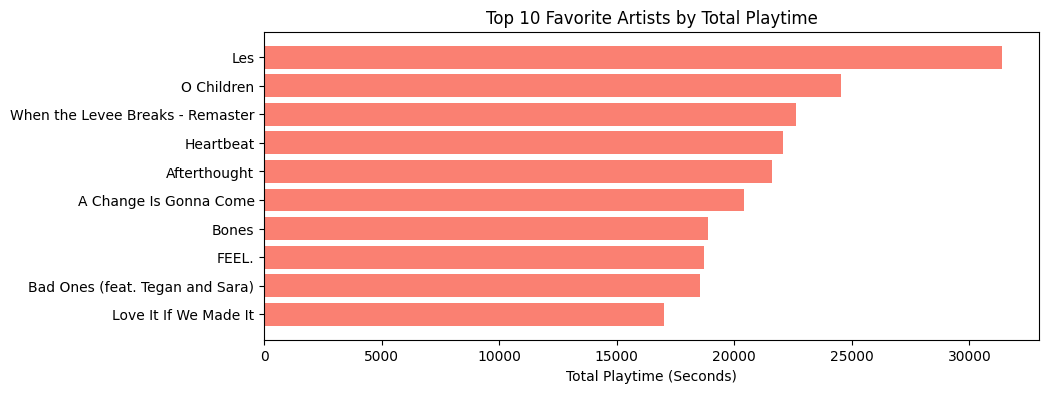

In [45]:
df_songs = df[['trackName', 'secPlayed']]
artist_playtime = df_songs.groupby('trackName')['secPlayed'].sum().reset_index()
artist_playtime_sorted = artist_playtime.sort_values(by='secPlayed', ascending=False)
top_10_artists = artist_playtime_sorted.head(10)

plt.figure(figsize = (10, 4))
plt.barh(top_10_artists['trackName'], top_10_artists['secPlayed'], color = 'salmon')
plt.gca().invert_yaxis()
plt.xlabel('Total Playtime (Seconds)')
plt.title('Top 10 Favorite Artists by Total Playtime')
plt.show()

## Part 3: Further analysis

#### 3.0 Average listening time by hour
Generate a plot that displays the average amount of time that music is played for each hour of the day.

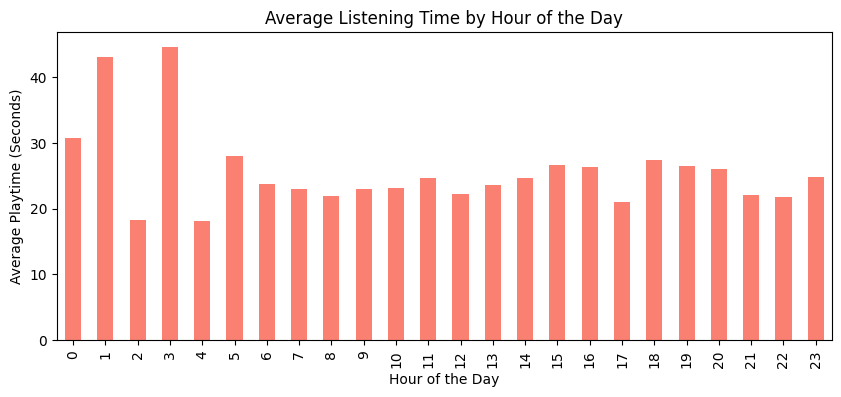

In [49]:
df['hour'] = df['end_time'].dt.hour
average_playtime_per_hour = df.groupby('hour')['secPlayed'].mean()

plt.figure(figsize=(10, 4))
average_playtime_per_hour.plot(kind='bar', color='salmon')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Playtime (Seconds)')
plt.title('Average Listening Time by Hour of the Day')
plt.show()

#### 3.1 Morning music and evening music
I think many people find that some types of music are more suitable for morning listening and some music is more suitable for evening listening. Create a plot that compares the play time of the artists *Leonard Cohen* and *Rage Against the Machine* on an hour-by-hour basis. See if there are any differences.

C:\Users\milad\AppData\Local\Temp\ipykernel_5404\1426459707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_artists['hour'] = df_artists['end_time'].dt.hour


<Figure size 1000x400 with 0 Axes>

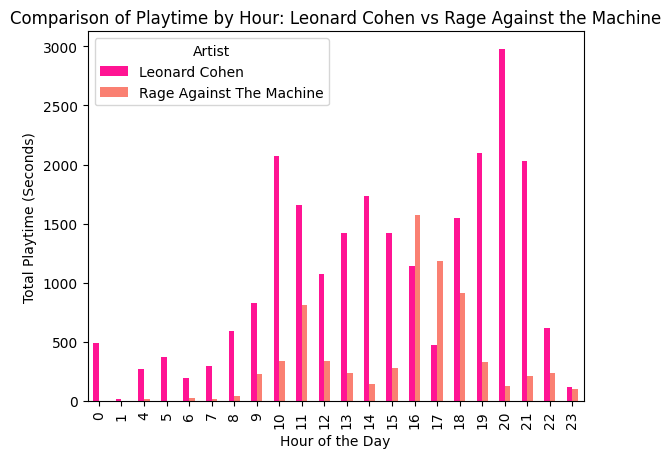

In [57]:
df_artists = df[df['artistName'].isin(['Leonard Cohen', 'Rage Against The Machine'])]

df_artists['hour'] = df_artists['end_time'].dt.hour
playtime_per_hour = df_artists.groupby(['hour', 'artistName'])['secPlayed'].sum().unstack()

plt.figure(figsize=(10, 4))
playtime_per_hour.plot(kind='bar', stacked=False, color=['deeppink', 'salmon'])
plt.xlabel('Hour of the Day')
plt.ylabel('Total Playtime (Seconds)')
plt.title('Comparison of Playtime by Hour: Leonard Cohen vs Rage Against the Machine')
plt.legend(title='Artist')
plt.show()

#### 3.2 Analysing skipped songs
Determining whether a song was skipped or listened to can be challenging. For this analysis, we'll simplify by defining a skipped song as any track played for less than 30 seconds. Conversely, a song played for 30 seconds or more is considered listened to. \
 Add a column to your DataFrame to reflect this criteria: set the value to 1 if the song was played for less than 30 seconds (indicating a skipped song), and 0 if it was played for 30 seconds or longer.

In [58]:
df['skipped'] = df['secPlayed'].apply(lambda x: 1 if x < 30 else 0)
print(df[['secPlayed', 'skipped']].head())


       secPlayed  skipped
10881      0.139        1
10882      0.487        1
10883      0.417        1
10884      2.205        1
10885      0.278        1


#### 3.3 Plotting skipped songs
Create a pie-chart that compares amount of skipped songs to amount of non-skipped songs.

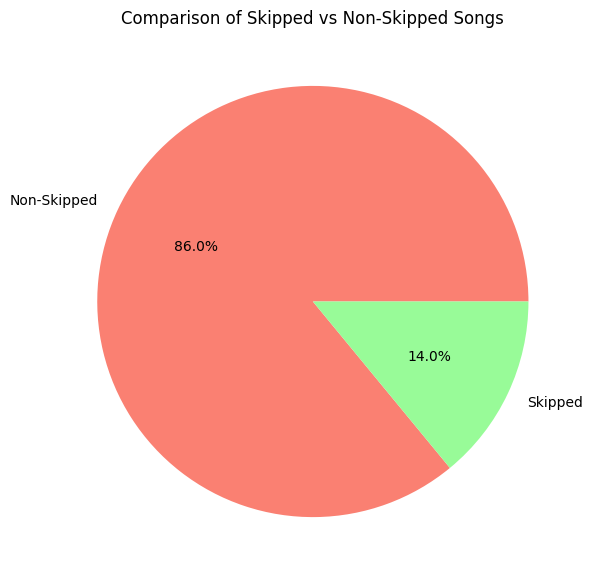

In [63]:
skipped_counts = df['skipped'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(skipped_counts, labels=['Non-Skipped', 'Skipped'], autopct='%1.1f%%', colors=['salmon', 'palegreen'])
plt.title('Comparison of Skipped vs Non-Skipped Songs')
plt.show()

#### 3.4 Artists by percentage of songs skipped
For each artist in the dataset, calculate which percentage of their songs was skipped. Store this information in a new DataFrame called `df_skipped`. Store the percentage of skipped songs in a new column named `SkipRate`\
\
**Example**: If an artist has **100** songs in your dataset and **25** of these were skipped, the percentage of skipped songs for this artist would be $\frac{25}{100}=25\%$

In [64]:
df_skipped = df.groupby('artistName')['skipped'].agg(
    total_songs='count',
    skipped_songs='sum'
).reset_index()

df_skipped['SkipRate'] = (df_skipped['skipped_songs'] / df_skipped['total_songs']) * 100

print(df_skipped[['artistName', 'SkipRate']].sort_values(by='SkipRate', ascending=False))


                   artistName    SkipRate
328            Hannah Montana  100.000000
28          Alexander Stewart  100.000000
560               No Vacation  100.000000
290                   G Mills  100.000000
793  The Marshall Tucker Band  100.000000
..                        ...         ...
70                Basstrologe   20.000000
878                     Wham!   16.666667
437                     LACES   14.285714
645                  Roc Boyz   11.111111
305             Gloria Gaynor    0.000000

[956 rows x 2 columns]


#### 3.5 Comparing artists by skip-rate 
Find the `three` top artists with the lowest skip-rate and the `three` with the highest. Print their names, along with their skip-rate.

In [65]:
df_skipped_sorted = df_skipped.sort_values(by='SkipRate', ascending=True)

lowest_skip_rate = df_skipped_sorted.head(3)
highest_skip_rate = df_skipped_sorted.tail(3)

print(lowest_skip_rate[['artistName', 'SkipRate']])
print(highest_skip_rate[['artistName', 'SkipRate']])


        artistName   SkipRate
305  Gloria Gaynor   0.000000
645       Roc Boyz  11.111111
437          LACES  14.285714
         artistName  SkipRate
290         G Mills     100.0
628           Ram√≥n     100.0
417  Kelly Clarkson     100.0


## Part 4: God Is a Data Scientist - The Ariana Deep-Dive

#### 4.0 Ariana-DataFrame: 
Create a new DataFrame called *df_ariana*, containing only rows with music by Ariana Grande.

In [ ]:
df_ariana = df[df['artistName'] == 'Ariana Grande']

#### 4.1 Average skip rate
Create a histogram of the distribution of the skip-rate values of the different artists in your DataFrame  `df_skipped`, with skip rates on one axis and number of artists on the other. \
\
Then, retrieve the skip rate for Ariana Grande from your DataFrame `df_skipped`. Run the code in the cell below. Where on this distribution does Ariana Grande fall? Do I skip her songs more than average, or less?

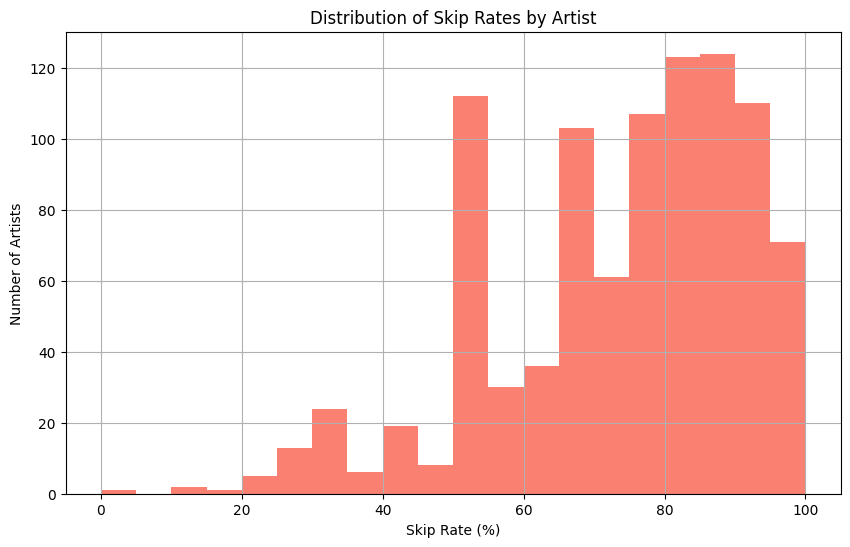

Ariana Grande's Skip Rate: 99.52939959662822%
Ariana Grande's skip rate is above average.


In [67]:

plt.figure(figsize=(10, 6))
plt.hist(df_skipped['SkipRate'], bins=20, color='salmon')
plt.xlabel('Skip Rate (%)')
plt.ylabel('Number of Artists')
plt.title('Distribution of Skip Rates by Artist')
plt.grid(True)
plt.show()

ariana_skip_rate = df_skipped[df_skipped['artistName'] == 'Ariana Grande']['SkipRate'].values[0]

print(f"Ariana Grande's Skip Rate: {ariana_skip_rate}%")

average_skip_rate = df_skipped['SkipRate'].mean()
if ariana_skip_rate > average_skip_rate:
    print("Ariana Grande's skip rate is above average.")
else:
    print("Ariana Grande's skip rate is below average.")


### Part 4: Questions
Q1: Did I skip a lot of Ariana Grande's songs, or did I not, compared to the rest of the dataset? \
    You skipped Ariana Grande songs more than the avarage skip rate. \
    \
Q2: What might be some possible reasons for Ariana Grande to be my nr.1 artist? \
    1. Ariana Grande was probobly in the playlists you listened too. \
    2. Even though you skipped, you listened to many different of her songs.